# Sprint 2: Data Preparation

### Loading data from CSV file

In [7]:
# import og nesecery libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [8]:
#youssef_path = '/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv'

#df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')
# Read interest rates from 2017-now
df_interest_2017_to_now = pd.read_excel('/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/interest_rate_2017_now.xlsx')

# Reading from split csv files
# define arr with csv file names from directory
dir = '/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/sp500/'
csv_files = [f'{dir}part_{i}.csv' for i in range(1, 26)]

# load all csv-files into a data frame
dfs = [pd.read_csv(file) for file in csv_files]

# combine all DFs in one
df_sp500 = pd.concat(dfs, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Cleaning SP500 DF

In [9]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Ticker     object 
dtypes: float64(6), object(2)
memory usage: 258.8+ MB


In [10]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,MMM
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,MMM
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,MMM
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,MMM
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,MMM


In [11]:
df_sp500 = df_sp500.drop(columns="Ticker")

In [12]:
df_sp500.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0
...,...,...,...,...,...,...,...
95,1962-05-17,0.0,3.344482,3.279160,3.311821,0.545793,164570.0
96,1962-05-18,0.0,3.285692,3.213838,3.272628,0.539334,183706.0
97,1962-05-21,0.0,3.331417,3.253031,3.324885,0.547946,118643.0
98,1962-05-22,0.0,3.311821,3.220370,3.226902,0.531798,153088.0


In [13]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
dtypes: float64(6), object(1)
memory usage: 226.4+ MB


In [14]:
df_sp500.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
# Converting Date column to DateTime format
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])
df_sp500.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [16]:
df_sp500.tail(1000)

,Date,Open,High,Low,Close,Adj Close,Volume
4238723,2020-09-22,160.350006,162.479996,160.100006,161.509995,156.638733,1545000.0
4238724,2020-09-23,161.970001,162.669998,159.119995,159.330002,154.524475,1301200.0
4238725,2020-09-24,158.839996,159.509995,156.529999,157.979996,153.215195,1415600.0
4238726,2020-09-25,157.429993,161.460007,157.250000,160.839996,155.988892,1195900.0
4238727,2020-09-28,162.160004,164.339996,161.160004,161.320007,156.454453,2293800.0
...,...,...,...,...,...,...,...
4239718,2024-09-06,187.460007,190.440002,187.059998,189.229996,189.229996,2710100.0
4239719,2024-09-09,190.550003,193.610001,190.089996,191.729996,191.729996,2652700.0
4239720,2024-09-10,191.729996,192.770004,187.820007,191.360001,191.360001,2675600.0
4239721,2024-09-11,190.710007,191.149994,186.440002,189.990005,189.990005,1387900.0


In [17]:
print(df_sp500['Date'].duplicated().sum())
df_sp500 = df_sp500.drop_duplicates(subset='Date')
df_sp500.info()

4223941
<class 'pandas.core.frame.DataFrame'>
Index: 15782 entries, 0 to 15781
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15782 non-null  datetime64[ns]
 1   Open       15782 non-null  float64       
 2   High       15782 non-null  float64       
 3   Low        15782 non-null  float64       
 4   Close      15782 non-null  float64       
 5   Adj Close  15782 non-null  float64       
 6   Volume     15782 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 986.4 KB


### Cleaning interest and inflation DF

In [18]:
df_interest_inflation['Effective Federal Funds Rate'].value_counts()

Effective Federal Funds Rate
0.09     13
0.16     11
5.25     10
3.00      8
0.12      8
         ..
11.34     1
12.01     1
12.92     1
11.93     1
0.66      1
Name: count, Length: 466, dtype: int64

In [19]:
df_interest_inflation.sample(15)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
856,2013,7,1,NaN,0.25,0.0,0.09,3.1,7.3,1.7
613,1997,4,1,5.50,NaN,NaN,5.51,6.2,5.1,2.7
689,2001,12,11,1.75,NaN,NaN,NaN,NaN,NaN,NaN
547,1992,9,1,3.25,NaN,NaN,3.22,NaN,7.6,3.3
516,1991,1,1,7.00,NaN,NaN,6.91,-1.9,6.4,5.6
797,2008,10,8,1.50,NaN,NaN,NaN,NaN,NaN,NaN
793,2008,7,1,2.00,NaN,NaN,2.01,-1.9,5.8,2.5
285,1978,4,1,NaN,NaN,NaN,6.89,16.5,6.1,6.5
751,2005,12,13,4.25,NaN,NaN,NaN,NaN,NaN,NaN
355,1983,7,1,9.00,NaN,NaN,9.37,8.1,9.4,3.0


In [20]:
# drop all columns we don't need
df_interest_inflation_dropped = df_interest_inflation.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)', 'Unemployment Rate'])

df_interest_inflation_dropped.head()


,Year,Month,Day,Effective Federal Funds Rate,Inflation Rate
0,1954,7,1,0.80,NaN
1,1954,8,1,1.22,NaN
2,1954,9,1,1.06,NaN
3,1954,10,1,0.85,NaN
4,1954,11,1,0.83,NaN


In [21]:
df_interest_inflation_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          904 non-null    int64  
 1   Month                         904 non-null    int64  
 2   Day                           904 non-null    int64  
 3   Effective Federal Funds Rate  752 non-null    float64
 4   Inflation Rate                710 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 35.4 KB


In [22]:
# Combine the columns Year, Month, Day into one DateTime column
df_interest_inflation_dropped['Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

# Insert the new column at the beginning
df_interest_inflation_dropped.insert(0, 'Date', df_interest_inflation_dropped.pop('Date'))

# Drop Year, Month and Day
df_interest_inflation_dropped = df_interest_inflation_dropped.drop(columns=['Year', 'Month', 'Day'])

# Show me the result
df_interest_inflation_dropped.head()

,Date,Effective Federal Funds Rate,Inflation Rate
0,1954-07-01,0.80,NaN
1,1954-08-01,1.22,NaN
2,1954-09-01,1.06,NaN
3,1954-10-01,0.85,NaN
4,1954-11-01,0.83,NaN


### Interest rate from 2017 to now

In [23]:
df_interest_2017_to_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Effective Date            1937 non-null   object 
 1   Rate Type                 1937 non-null   object 
 2   Rate (%)                  1937 non-null   float64
 3   1st Percentile (%)        1937 non-null   float64
 4   25th Percentile (%)       1937 non-null   float64
 5   75th Percentile (%)       1937 non-null   float64
 6   99th Percentile (%)       1937 non-null   float64
 7   Volume ($Billions)        1937 non-null   int64  
 8   Target Rate From (%)      1937 non-null   float64
 9   Target Rate To (%)        1937 non-null   float64
 10  Intra Day - Low (%)       0 non-null      float64
 11  Intra Day - High (%)      0 non-null      float64
 12  Standard Deviation (%)    0 non-null      float64
 13  30-Day Average SOFR       0 non-null      float64
 14  90-Day A

In [24]:
df_interest_2017_to_now.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
0,09/16/2024,EFFR,5.33,5.31,5.32,5.33,5.35,96,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/13/2024,EFFR,5.33,5.31,5.32,5.33,5.35,105,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/12/2024,EFFR,5.33,5.31,5.32,5.33,5.35,111,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/11/2024,EFFR,5.33,5.31,5.32,5.33,5.35,105,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/10/2024,EFFR,5.33,5.31,5.32,5.33,5.35,101,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Drop all rows i don't need - only need date and Rate(%)
df_interest_2017_to_now1 = df_interest_2017_to_now.filter(items=['Effective Date', 'Target Rate To (%)'])
df_interest_2017_to_now1.head()

,Effective Date,Target Rate To (%)
0,09/16/2024,5.5
1,09/13/2024,5.5
2,09/12/2024,5.5
3,09/11/2024,5.5
4,09/10/2024,5.5


In [26]:
# Convert the current column with date to a column with datetime data type and drop the 'Effective Date'
df_interest_2017_to_now1['Date'] = pd.to_datetime(df_interest_2017_to_now1['Effective Date'])
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns=['Effective Date'])
df_interest_2017_to_now1.head()

,Target Rate To (%),Date
0,5.5,2024-09-16
1,5.5,2024-09-13
2,5.5,2024-09-12
3,5.5,2024-09-11
4,5.5,2024-09-10


In [27]:
# Only keep rows where the date has actually changed
df_interest_2017_to_now1['RateChange'] = df_interest_2017_to_now1['Target Rate To (%)'].diff()
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date,RateChange
0,5.5,2024-09-16,NaN
1,5.5,2024-09-13,0.0
2,5.5,2024-09-12,0.0
3,5.5,2024-09-11,0.0
4,5.5,2024-09-10,0.0
5,5.5,2024-09-09,0.0
6,5.5,2024-09-06,0.0
7,5.5,2024-09-05,0.0
8,5.5,2024-09-04,0.0
9,5.5,2024-09-03,0.0


In [28]:
mode = df_interest_2017_to_now1['RateChange'].mode()[0]
df_interest_2017_to_now1['RateChange'].fillna(mode, inplace=True)
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date,RateChange
0,5.5,2024-09-16,0.0
1,5.5,2024-09-13,0.0
2,5.5,2024-09-12,0.0
3,5.5,2024-09-11,0.0
4,5.5,2024-09-10,0.0
5,5.5,2024-09-09,0.0
6,5.5,2024-09-06,0.0
7,5.5,2024-09-05,0.0
8,5.5,2024-09-04,0.0
9,5.5,2024-09-03,0.0


In [29]:
df_interest_2017_to_now1 = df_interest_2017_to_now1[df_interest_2017_to_now1['RateChange'] != 0]
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns='RateChange')
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date
287,5.25,2023-07-26
344,5.00,2023-05-03
374,4.75,2023-03-22
408,4.50,2023-02-01
440,4.00,2022-12-14
468,3.25,2022-11-02
497,2.50,2022-09-21
536,1.75,2022-07-27
564,1.00,2022-06-15
593,0.50,2022-05-04


## Combining data sets

In [30]:
# Combining into one df
df_merged = pd.merge(df_interest_inflation_dropped, df_sp500, on='Date', how='outer') # how can also be inner (default), left, right
df = pd.merge(df_interest_2017_to_now1, df_merged, on='Date', how='outer').sort_values(by='Date')
df.tail()

,Target Rate To (%),Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume
16107,NaN,2024-09-06,NaN,NaN,130.500000,132.100006,128.020004,128.600006,128.600006,3562200.0
16108,NaN,2024-09-09,NaN,NaN,129.389999,130.979996,128.190002,128.460007,128.460007,3616300.0
16109,NaN,2024-09-10,NaN,NaN,128.850006,130.160004,128.460007,130.089996,130.089996,2732500.0
16110,NaN,2024-09-11,NaN,NaN,129.500000,130.380005,127.120003,130.229996,130.229996,3283800.0
16111,NaN,2024-09-12,NaN,NaN,130.300003,132.720001,130.100006,132.029999,132.029999,3978716.0


In [31]:
df.isna().sum()

Target Rate To (%)              16089
Date                                0
Effective Federal Funds Rate    15360
Inflation Rate                  15402
Open                              330
High                              330
Low                               330
Close                             330
Adj Close                         330
Volume                            330
dtype: int64

In [32]:
# Take the values form column 'Target Rate To (%)' and copy them to 'Effective Federal Funds Rate' if NaN
df['InterestRate'] = df['Effective Federal Funds Rate'].combine_first(df['Target Rate To (%)'])
df_clean = df.drop(columns=['Effective Federal Funds Rate', 'Target Rate To (%)'])
df_clean.head(20)

,Date,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate
23,1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80
24,1954-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22
25,1954-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06
26,1954-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85
27,1954-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83
28,1954-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.28
29,1955-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.39
30,1955-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29
31,1955-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.35
32,1955-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43


In [33]:
# Fill interest rate value with last known, so there are no NaN
df_clean['InterestRate'] = df_clean['InterestRate'].ffill()
df_clean['Inflation Rate'] = df_clean['Inflation Rate'].ffill()
df_clean['Inflation Rate'] = df_clean['Inflation Rate'].bfill()

## Create more data
I want to add more columns with data about the difference in 'Close' price before and after the interest rate change. Maybe clean data first - no NaN?

In [34]:
df_clean.isna().sum()

Date                0
Inflation Rate      0
Open              330
High              330
Low               330
Close             330
Adj Close         330
Volume            330
InterestRate        0
dtype: int64

In [35]:
df_clean = df_clean.dropna()

In [36]:
def filter_df(df):
  filtered_df = df[(df['Date'] >= pd.Timestamp('1962-01-01')) & (df['Date'] <= pd.Timestamp('2024-09-12'))]
  return filtered_df

df_clean_filtered = filter_df(df_clean).reset_index(drop=True)

In [37]:
df_clean_filtered.head(20)

,Date,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate
0,1962-01-02,1.3,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,2.15
1,1962-01-03,1.3,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,2.15
2,1962-01-04,1.3,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,2.15
3,1962-01-05,1.3,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,2.15
4,1962-01-08,1.3,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,2.15
5,1962-01-09,1.3,0.0,3.416336,3.377143,3.390207,0.557025,376979.0,2.15
6,1962-01-10,1.3,0.0,3.383675,3.344482,3.351014,0.550585,304262.0,2.15
7,1962-01-11,1.3,0.0,3.370610,3.259563,3.337949,0.548438,269818.0,2.15
8,1962-01-12,1.3,0.0,3.383675,3.272628,3.272628,0.537706,692723.0,2.15
9,1962-01-15,1.3,0.0,3.311821,3.272628,3.305288,0.543072,252595.0,2.15


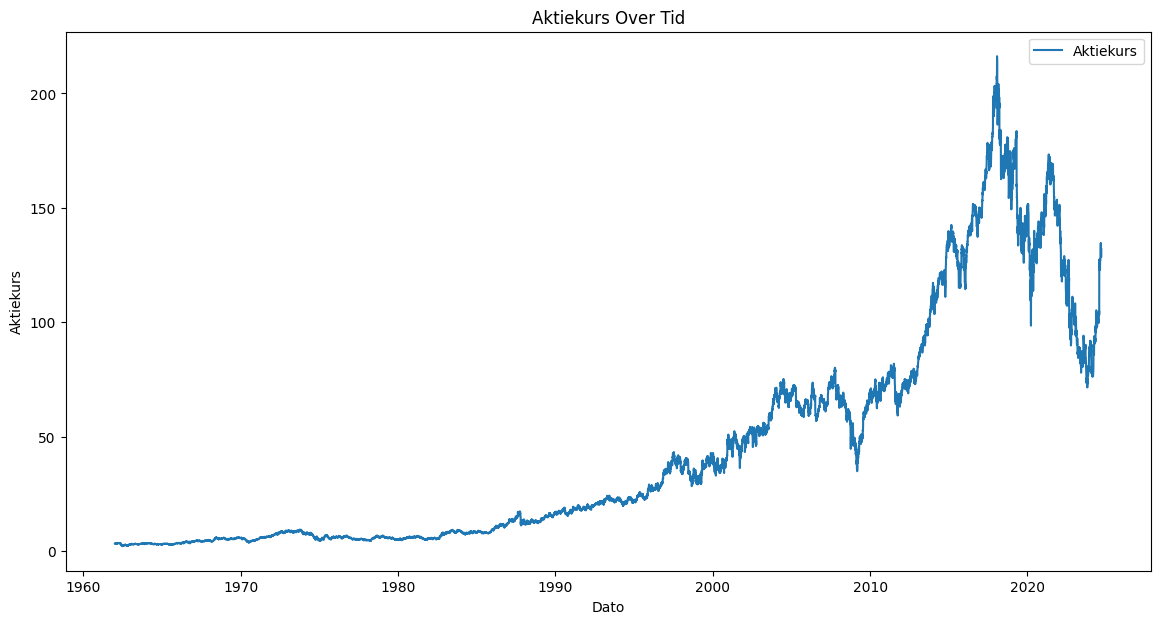

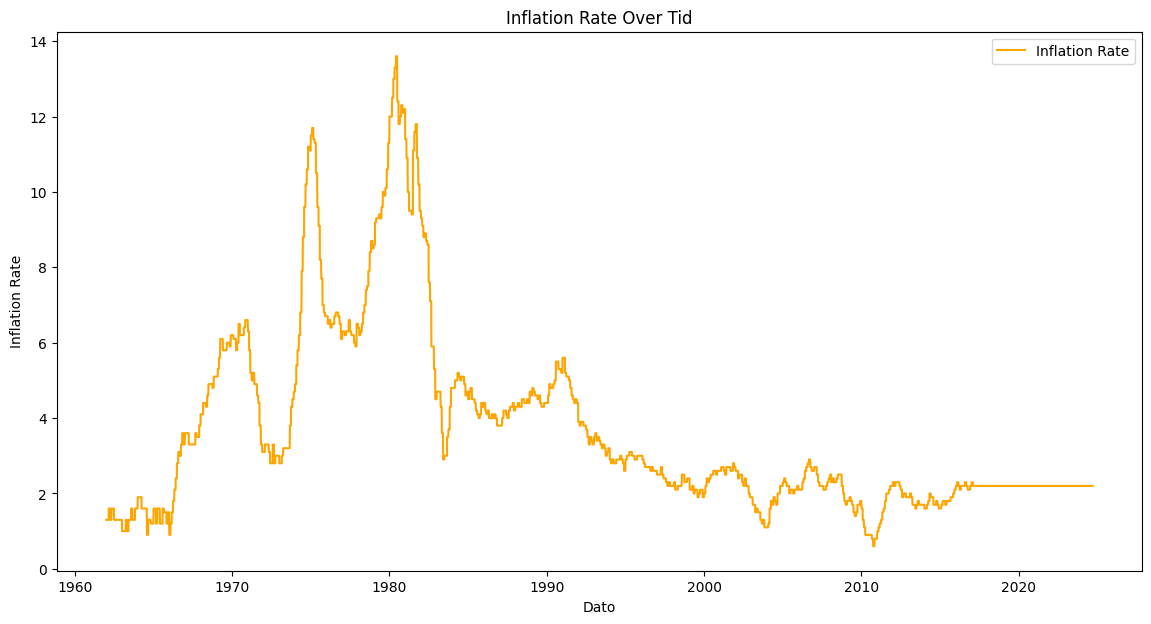

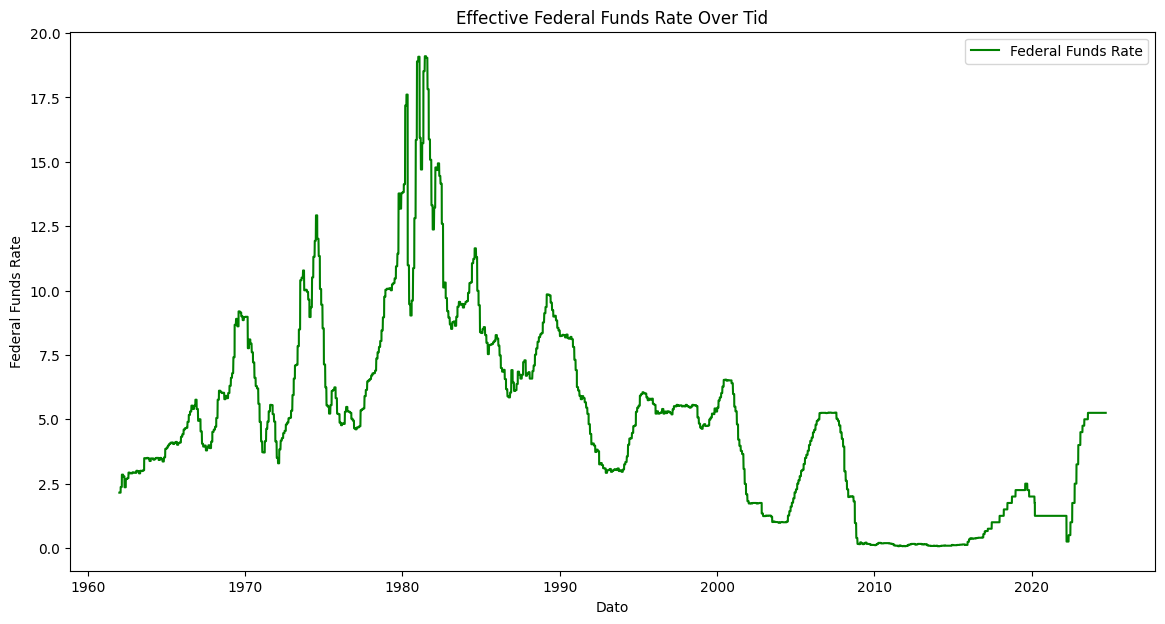

In [38]:
#Plot aktiekurser
plt.figure(figsize=(14, 7))
plt.plot(df_clean_filtered['Date'], df_clean_filtered['Close'], label='Aktiekurs')
plt.xlabel('Dato')
plt.ylabel('Aktiekurs')
plt.title('Aktiekurs Over Tid')
plt.legend()
plt.show()

#Plot inflation rate
plt.figure(figsize=(14, 7))
plt.plot(df_clean_filtered['Date'], df_clean_filtered['Inflation Rate'], label='Inflation Rate', color='orange')
plt.xlabel('Dato')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over Tid')
plt.legend()
plt.show()

#Plot effective federal funds rate
plt.figure(figsize=(14, 7))
plt.plot(df_clean_filtered['Date'], df_clean_filtered['InterestRate'], label='Federal Funds Rate', color='green')
plt.xlabel('Dato')
plt.ylabel('Federal Funds Rate')
plt.title('Effective Federal Funds Rate Over Tid')
plt.legend()
plt.show()

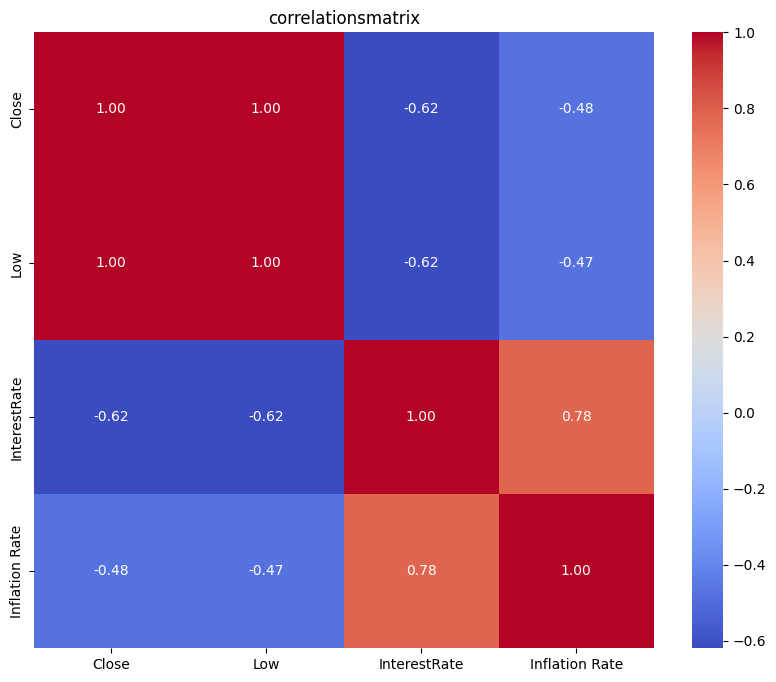

In [55]:
correlation_matrix = df_clean_filtered[['Close', 'Low', 'InterestRate', 'Inflation Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## Compare interest rate change to X day index change

In [39]:
# Make copy of current cleaned and filtered data frame
df_diff = df_clean_filtered.copy()
# Calculate interest rate changes an save in new column
df_diff['InterestRateChange'] = df_diff['InterestRate'].diff()
# Flag days where there is a change in interest rate with 1
df_diff['InterestRateChangeFlag'] = np.where(df_diff['InterestRateChange'] != 0, 1, 0)

# Calculate the difference between the open and close value on the same day
df_diff['OPEN_CLOSE_CHANGE'] = (df_diff['Close'] - df_diff['Open']) / df_diff['Open']

# Calculate the change of the "Close" value X days from the interest rate change
# and place it the same number of days back on the potential interest change day
df_diff[f'1_DAYS_PLUS'] = df_diff['Close'].diff(periods=1).shift(-1)
df_diff[f'2_DAYS_PLUS'] = df_diff['Close'].diff(periods=2).shift(-2)
df_diff[f'3_DAYS_PLUS'] = df_diff['Close'].diff(periods=3).shift(-3)
df_diff[f'4_DAYS_PLUS'] = df_diff['Close'].diff(periods=4).shift(-4)
df_diff[f'5_DAYS_PLUS'] = df_diff['Close'].diff(periods=5).shift(-5)
df_diff[f'10_DAYS_PLUS'] = df_diff['Close'].diff(periods=10).shift(-10)
df_diff[f'20_DAYS_PLUS'] = df_diff['Close'].diff(periods=20).shift(-20)

df_diff[f'1_DAYS_MINUS'] = df_diff['Close'].diff(periods=-1).shift(1)
df_diff[f'2_DAYS_MINUS'] = df_diff['Close'].diff(periods=-2).shift(2)
df_diff[f'3_DAYS_MINUS'] = df_diff['Close'].diff(periods=-3).shift(3)
df_diff[f'4_DAYS_MINUS'] = df_diff['Close'].diff(periods=-4).shift(4)
df_diff[f'5_DAYS_MINUS'] = df_diff['Close'].diff(periods=-5).shift(5)
df_diff[f'10_DAYS_MINUS'] = df_diff['Close'].diff(periods=-10).shift(10)
df_diff[f'20_DAYS_MINUS'] = df_diff['Close'].diff(periods=-20).shift(20)

In [40]:
df_diff.head()

,Date,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate,InterestRateChange,...,5_DAYS_PLUS,10_DAYS_PLUS,20_DAYS_PLUS,1_DAYS_MINUS,2_DAYS_MINUS,3_DAYS_MINUS,4_DAYS_MINUS,5_DAYS_MINUS,10_DAYS_MINUS,20_DAYS_MINUS
0,1962-01-02,1.3,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,2.15,NaN,...,-0.084918,-0.111047,-0.150240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-01-03,1.3,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,2.15,0.0,...,-0.150240,-0.163305,-0.052257,-0.026129,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-01-04,1.3,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,2.15,0.0,...,-0.163305,-0.137176,0.052258,0.000000,-0.026129,NaN,NaN,NaN,NaN,NaN
3,1962-01-05,1.3,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,2.15,0.0,...,-0.137176,-0.084919,0.182901,0.091450,0.091450,0.065321,NaN,NaN,NaN,NaN
4,1962-01-08,1.3,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,2.15,0.0,...,-0.084919,-0.045725,0.261288,0.019597,0.111047,0.111047,0.084918,NaN,NaN,NaN


In [41]:
# See if there are and how many inf values there are
np.isinf(df_diff).sum()

Date                         0
Inflation Rate               0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume                       0
InterestRate                 0
InterestRateChange           0
InterestRateChangeFlag       0
OPEN_CLOSE_CHANGE         1987
1_DAYS_PLUS                  0
2_DAYS_PLUS                  0
3_DAYS_PLUS                  0
4_DAYS_PLUS                  0
5_DAYS_PLUS                  0
10_DAYS_PLUS                 0
20_DAYS_PLUS                 0
1_DAYS_MINUS                 0
2_DAYS_MINUS                 0
3_DAYS_MINUS                 0
4_DAYS_MINUS                 0
5_DAYS_MINUS                 0
10_DAYS_MINUS                0
20_DAYS_MINUS                0
dtype: int64

In [42]:
# Replace inf values with NaN to handle them
df_diff.replace([np.inf, -np.inf], np.nan, inplace=True)

In [43]:
df_diff.fillna(0, inplace=True)

In [44]:
df_diff = df_diff[df_diff['InterestRateChangeFlag'] == 1]

### Normalize

In [45]:
# Laver en kopi af DataFrame uden dato kolonnen (som ikke skal normaliseres)
df_no_date = df_diff.drop(columns=['Date', 'InterestRateChangeFlag'])

# Initialiserer MinMaxScaler
scaler = MinMaxScaler()

# Anvender skaleringen på dataene
df_scaled = scaler.fit_transform(df_no_date)

# Konverterer tilbage til en DataFrame med de samme kolonnenavne
df_scaled = pd.DataFrame(df_scaled, columns=df_no_date.columns)

# Tilføj dato kolonnen tilbage
# df_scaled['Date'] = df['Date']

df_scaled.head()

,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRate,InterestRateChange,OPEN_CLOSE_CHANGE,...,5_DAYS_PLUS,10_DAYS_PLUS,20_DAYS_PLUS,1_DAYS_MINUS,2_DAYS_MINUS,3_DAYS_MINUS,4_DAYS_MINUS,5_DAYS_MINUS,10_DAYS_MINUS,20_DAYS_MINUS
0,0.039062,0.0,0.005185,0.005148,0.004864,0.001014,0.013576,0.109301,0.684211,0.434134,...,0.665846,0.596942,0.607991,0.510075,0.585315,0.462783,0.406920,0.482490,0.447997,0.348016
1,0.039062,0.0,0.005284,0.005081,0.005261,0.001098,0.018286,0.120862,0.706914,0.434134,...,0.673873,0.597829,0.609433,0.502204,0.566193,0.448697,0.395118,0.471344,0.438828,0.346503
2,0.062500,0.0,0.005020,0.005148,0.004864,0.001025,0.005264,0.146085,0.733746,0.434134,...,0.669414,0.610244,0.617004,0.511059,0.583676,0.463144,0.408062,0.485193,0.446732,0.347259
3,0.039062,0.0,0.005680,0.006051,0.005724,0.001207,0.003602,0.142407,0.676987,0.434134,...,0.666143,0.599603,0.605467,0.510567,0.585861,0.462061,0.405017,0.481815,0.447681,0.341587
4,0.062500,0.0,0.004524,0.004346,0.004500,0.000949,0.021196,0.120336,0.640867,0.434134,...,0.672981,0.601081,0.601501,0.503680,0.593510,0.468562,0.416438,0.491948,0.457166,0.355011


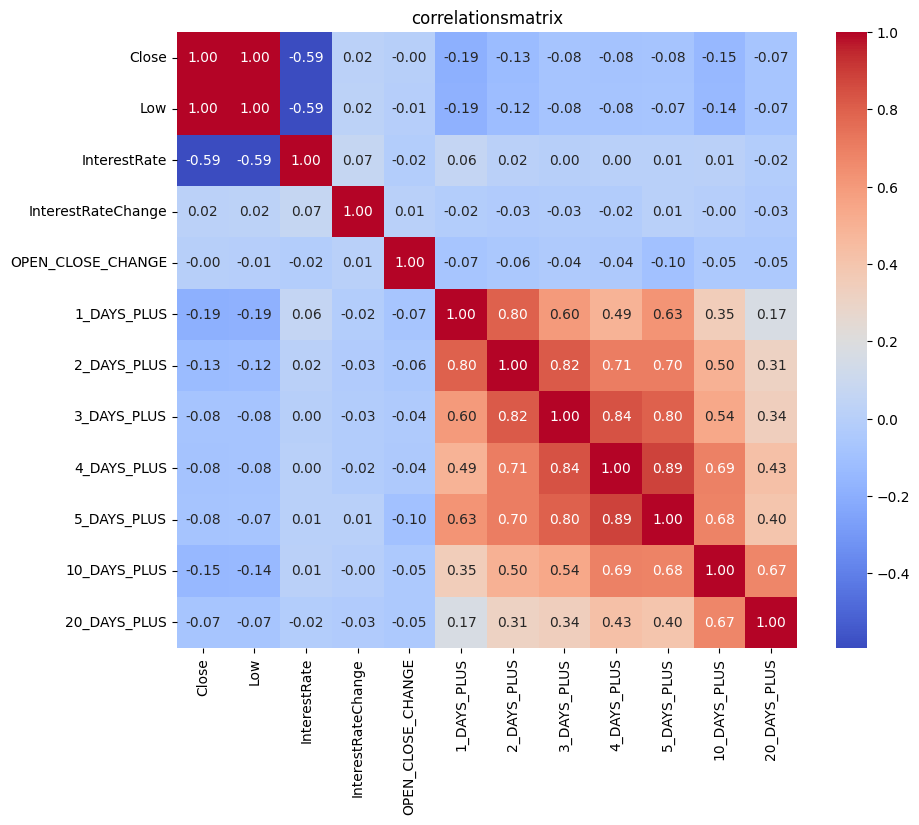

In [46]:
#Beregn korrelation
correlation_matrix = df_scaled[['Close', 'Low', 'InterestRate', 'InterestRateChange', 'OPEN_CLOSE_CHANGE', '1_DAYS_PLUS', '2_DAYS_PLUS', '3_DAYS_PLUS', '4_DAYS_PLUS', '5_DAYS_PLUS', '10_DAYS_PLUS', '20_DAYS_PLUS']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

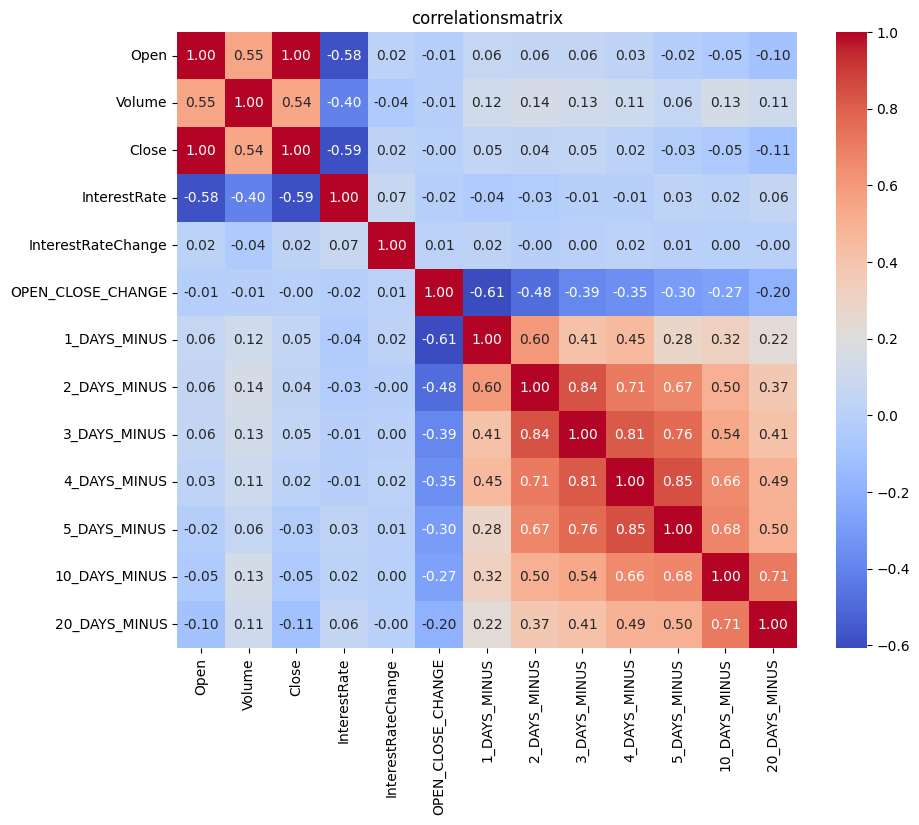

In [47]:
#Beregn korrelation med dage før renteændring
correlation_matrix_minus = df_diff[['Open', 'Volume', 'Close', 'InterestRate', 'InterestRateChange', 'OPEN_CLOSE_CHANGE', '1_DAYS_MINUS', '2_DAYS_MINUS', '3_DAYS_MINUS', '4_DAYS_MINUS', '5_DAYS_MINUS', '10_DAYS_MINUS', '20_DAYS_MINUS']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_minus, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

In [48]:
# Preparing data for comparing interest rate changes to
# from correlation import fe_interest_changes
#days = 10
#df_diff = fe_interest_changes(days, df_clean_filtered)
#df_interest_price_corr.head()

In [49]:
# Perform Pearson correlation between interest rate changes and S&P 500 percentage change
corr, p_value = pearsonr(df_interest_price_corr['InterestRateChange'], df_interest_price_corr['SP500_10DAY_Change'])

# Print the results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# A correlation coefficient closer to 1 or -1 indicates strong correlation, while near 0 indicates no correlation.
# A small p-value (typically < 0.05) suggests that the correlation is statistically significant.

NameError: name 'df_interest_price_corr' is not defined

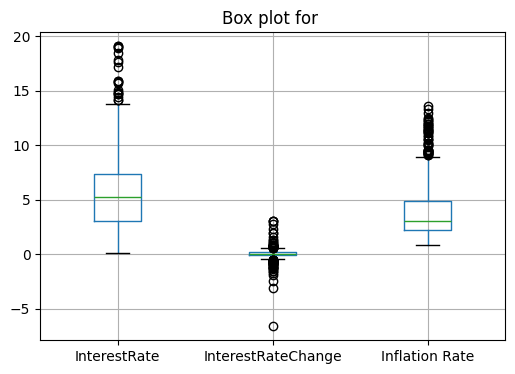

In [53]:
# See outliers 'InterestRate', 'InterestRateChange', '1_DAYS_PLUS', '2_DAYS_PLUS', '3_DAYS_PLUS', '4_DAYS_PLUS', '5_DAYS_PLUS', '10_DAYS_PLUS', '20_DAYS_PLUS'
plt.figure(figsize=(6, 4))
df_diff.boxplot(column=['InterestRate', 'InterestRateChange', 'Inflation Rate'])
plt.title(f'Box plot for ')
plt.show()

In [1]:
#Beregn korrelation
correlation_matrix = df_interest_price_corr[['InterestRateChange', 'SP500_10DAY_Change', 'Close', 'Effective Federal Funds Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

NameError: name 'df_interest_price_corr' is not defined